In [1]:
# python v3.11.8
# import necessary packages

import os
import sys

import pandas as pd
import numpy as np

sys.path.append('functions')

from greatbrowser import great_analysis

from gene_analysis_functions import get_cistrome, get_pos, insig_nan
from pseudoinverse_functions import pinv_dropmin, quality_filter, trait_cluster

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
Establich cwd, get relevant data, and perform basic formatting
'''

# set directory, import data, drop undefined
os.chdir('C:\\Users\\Q004\\Desktop\\pellegrini_lab_research\\raw_data')
data = pd.read_excel('methylation_phenotype_encoded.xlsx', index_col=0) # mm39
data = data.dropna()

# referring to the point in the data where methylation and phenotype data diverge
sep=55

# seperate trait and methylation data
trait_data = data[:sep]
meth_data = data[sep:]

print(f'{trait_data.shape[0]} traits')

55 traits


In [3]:
# filter trait data to minimize colinearity
filter = 0.70
f_trait_data = quality_filter(trait_data, filter)

print(f'\n{f_trait_data.shape[0]} traits')


initializing: M16_poststress_GLU

M16_poststress_BW corr: 0.023720658191998683
M16_poststress_FM_g corr: 0.15170584503159446
M16_poststress_food_g corr: 0.1572267599168086
M16_poststress_FFM_g corr: 0.016038987694264484
M14_poststress_FFM_g corr: 0.1032664053853798
M14_poststress_food_g corr: 0.15795322028701717
M14_poststress_BW corr: 0.15622879032638945
M14_poststress_GLU corr: 0.6719015152375838
M14_poststress_FM_g corr: 0.3359654636524691
M12_poststress_FFM_g corr: 0.13022424239458588
M12_poststress_FM_g corr: 0.30474076619102525
M12_poststress_GLU corr: 0.6090336912254721
M12_poststress_BW corr: 0.2725029351380857
M12_poststress_food_g corr: 0.11015798652162395
M10_poststress_FFM_g corr: 0.14497224377218185
M10_poststress_GLU corr: 0.5802400592602832
M10_poststress_FM_g corr: 0.5008174335569449
M10_poststress_BW corr: 0.20714440200743167
M10_poststress_food_g corr: 0.24895087822309858
M8_poststress_FFM_g corr: 0.13864898633105477
M8_poststress_BW corr: 0.2844628216470895
M8_posts

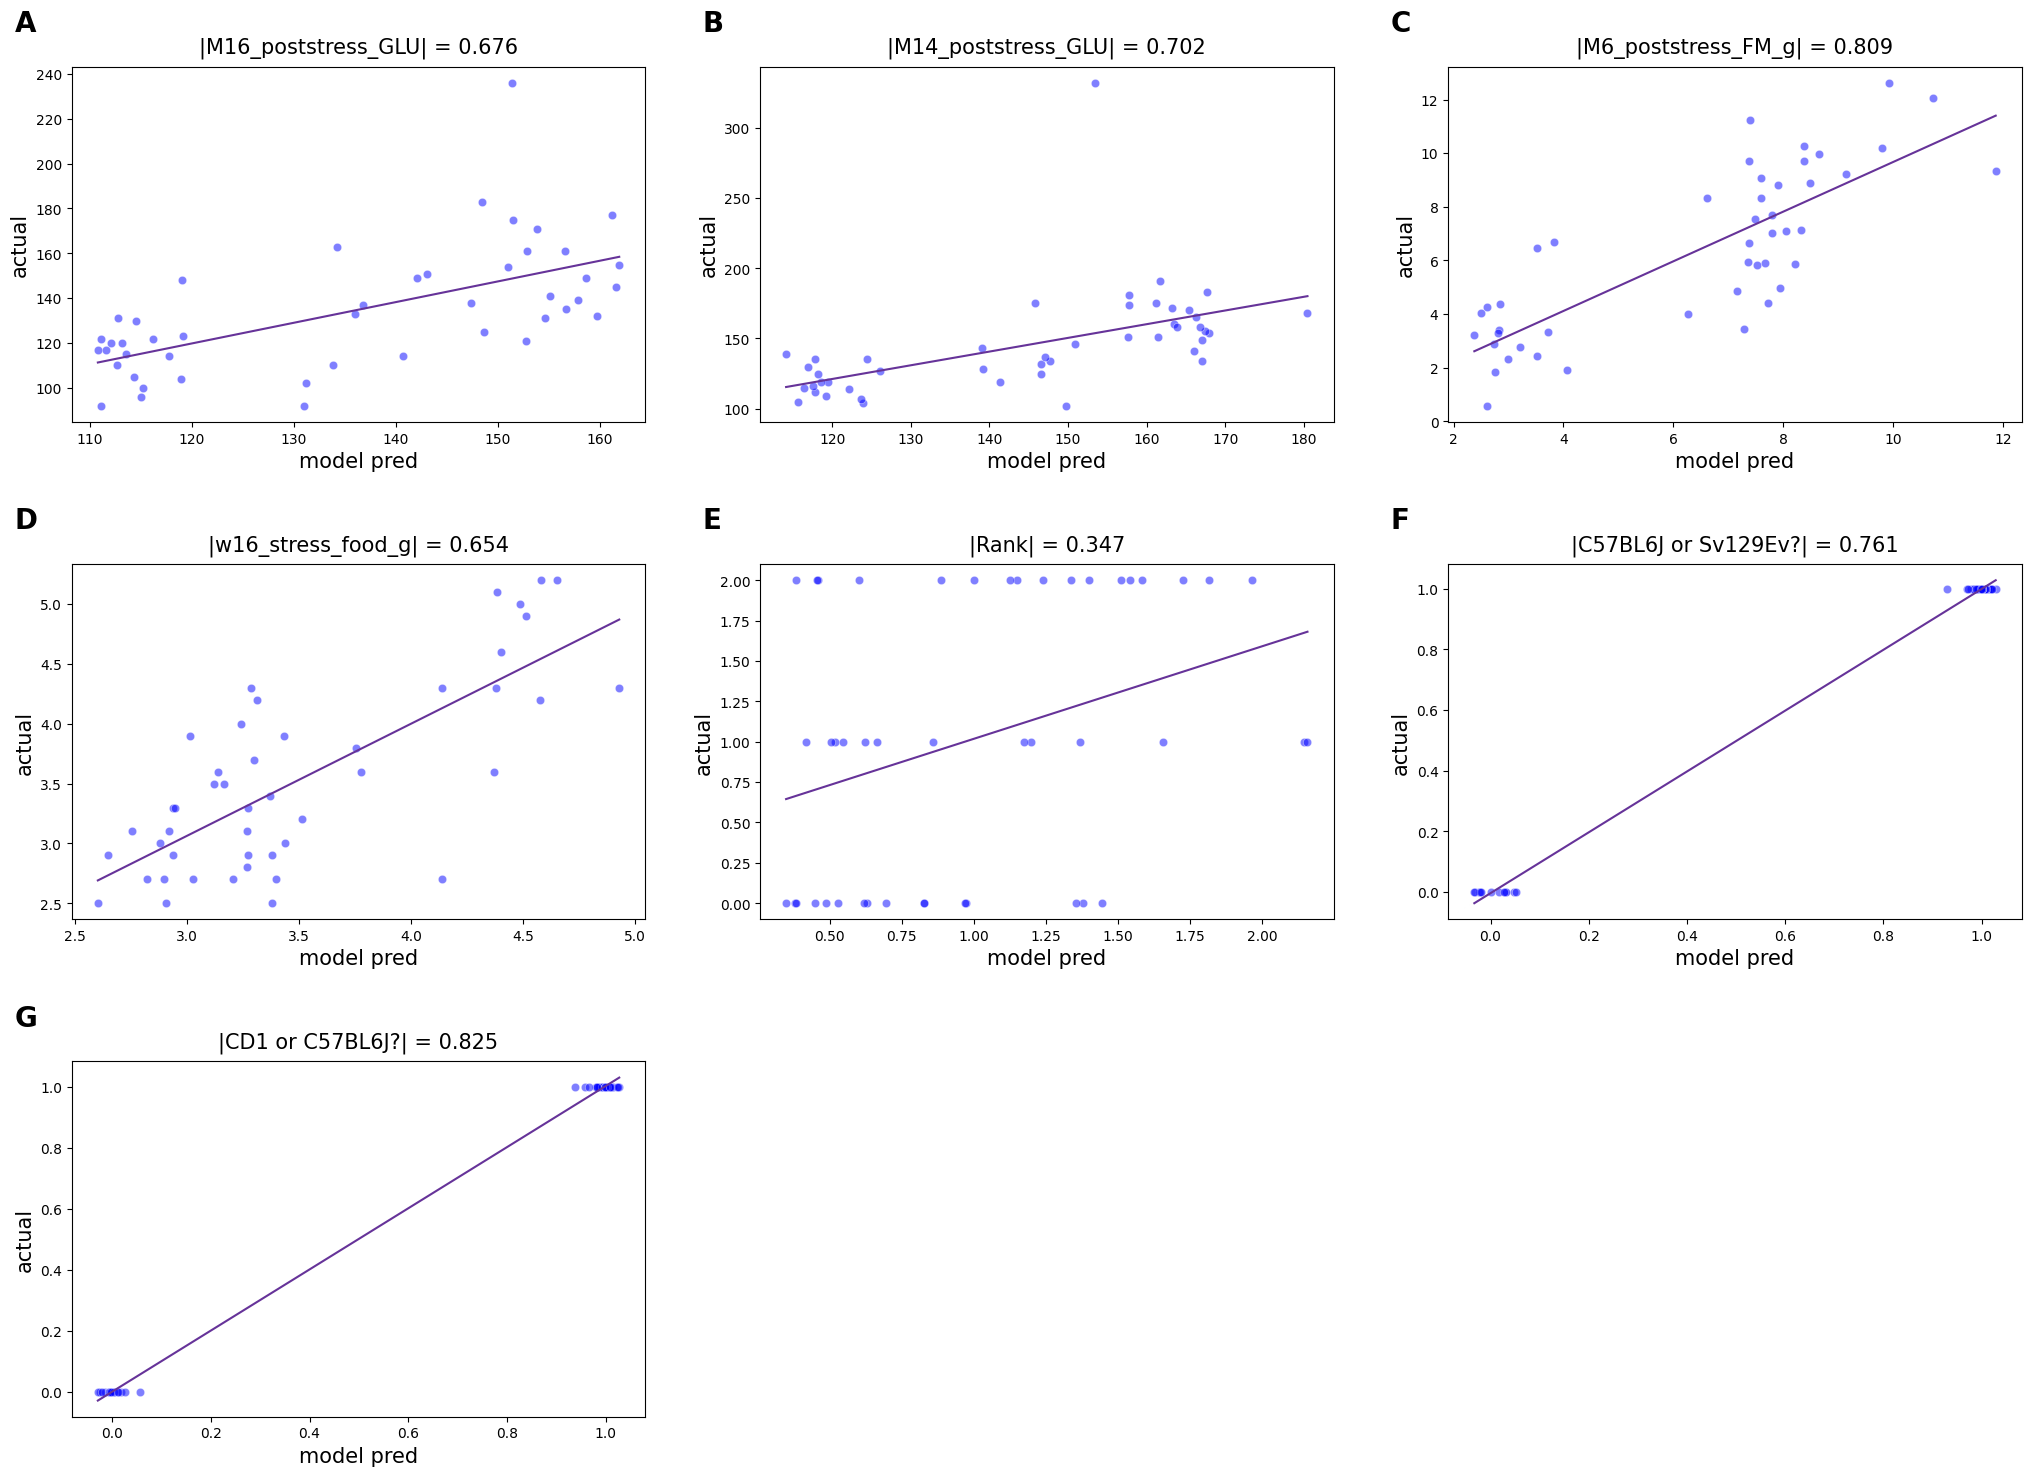

In [4]:
# generate pseudoinversion plots
thresh = 0.60
meth_filter_thresh = 0.50
pinv_dropmin(f_trait_data, meth_data, thresh, 
             find_meth=False, to_filter_meth=True, 
             meth_filter_thresh=meth_filter_thresh);

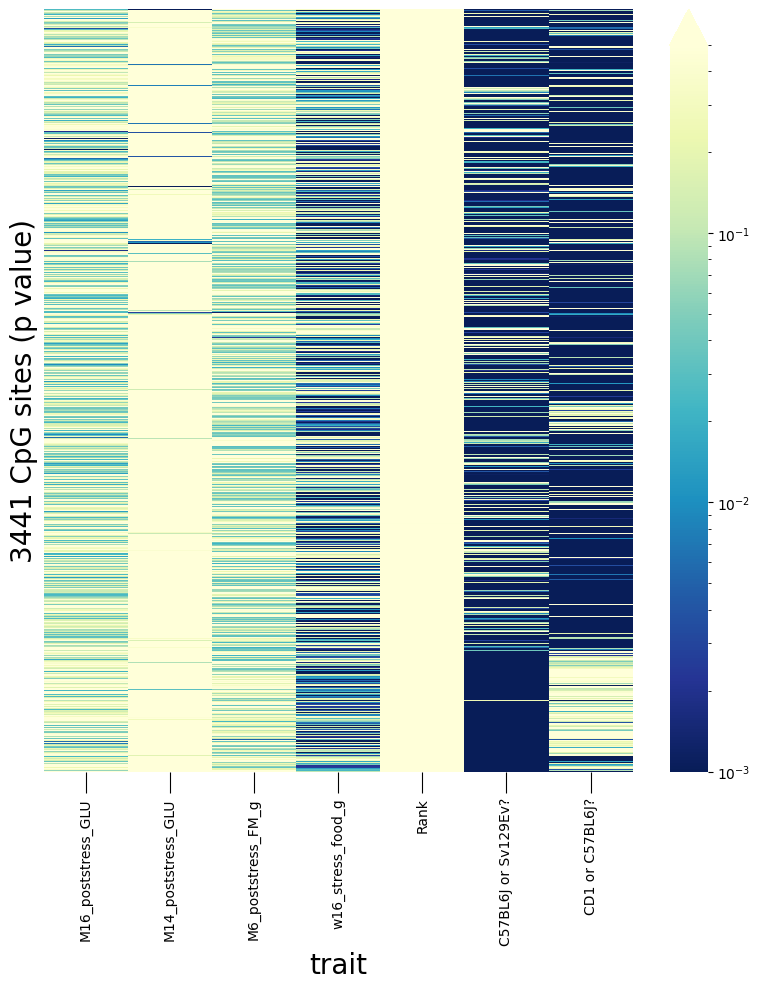

In [5]:
# generate heatmap of probe/trait MMR AdjP values
is_filtered = True
trait_vals, trait_pvals, trait_coef = pinv_dropmin(f_trait_data, meth_data, thresh, 
                                                   find_meth=True, plot_results=True, 
                                                   to_filter_meth=is_filtered, meth_filter_thresh=meth_filter_thresh);

In [6]:
# identify most significant probes
mm39_data = pd.read_excel('mm39_formatted_manifest.xlsx', index_col=0)
probe_df = get_pos(trait_vals, mm39_data);

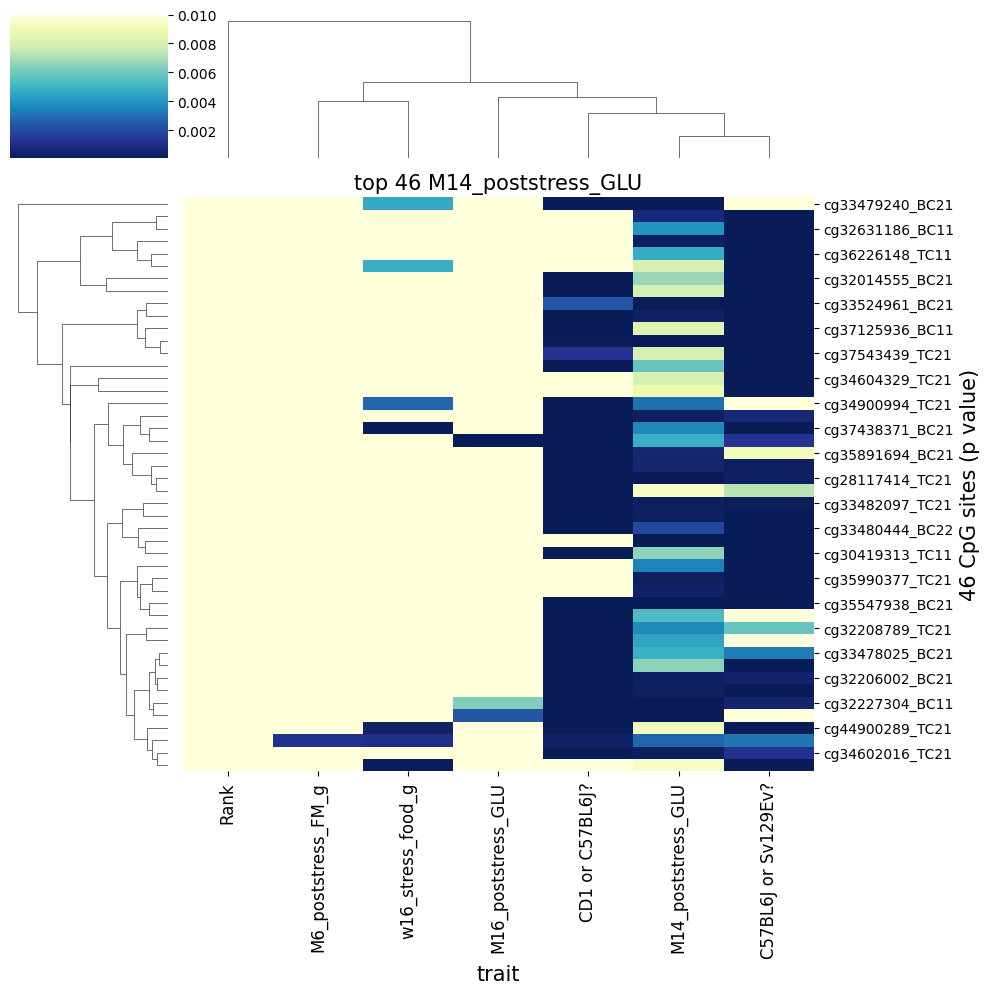

In [7]:
# generate a clustermap of significant probes for selected trait
sig_df = insig_nan(probe_df)
trait = 'M14_poststress_GLU_pval'

temp = sig_df[trait].values
temp = temp[~np.isnan(temp)]
n_probes = len(temp)

trait_cluster(trait_pvals, trait[:-5], n_probes);

In [8]:
# find gene associations of probes via GREAT

temp = probe_df.reset_index()
temp = great_analysis(temp, get='genes', df_chr ='chr_mm10', df_start='pos_mm10', df_end='end_mm10', df_index='index')

temp = temp.set_index('index')
trait_vals['associated_genes'] = temp['associated_genes']

trait_vals.to_excel('pseudoinverse_probes_filtered.xlsx')
trait_vals

,M16_poststress_GLU_pval,M16_poststress_GLU_coef,M14_poststress_GLU_pval,M14_poststress_GLU_coef,M6_poststress_FM_g_pval,M6_poststress_FM_g_coef,w16_stress_food_g_pval,w16_stress_food_g_coef,Rank_pval,Rank_coef,...,C57BL6J or Sv129Ev?_coef,CD1 or C57BL6J?_pval,CD1 or C57BL6J?_coef,chr_mm39,pos_mm39,end_mm39,chr_mm10,pos_mm10,end_mm10,associated_genes
index,,,,,,,,,,,,,,,,,,,,,
cg28113426_BC11,0.789472,-0.000047,0.999869,-0.000100,0.666153,0.000982,0.103131,0.009125,0.932579,-0.006018,...,0.000548,2.484416e-34,0.658940,chr10,3802852,3802854,chr10,3852852.0,3852854.0,"Mthfd1l (-120,278), Plekhg1 (+112,489)"
cg28116521_BC11,0.047950,0.001197,0.000617,-0.002046,0.656930,0.003467,0.253699,0.021870,0.949554,0.010958,...,0.153297,5.054036e-14,0.553085,chr10,4080228,4080230,chr10,4130228.0,4130230.0,"Akap12 (-136,151), Mthfd1l (+157,098)"
cg28117414_TC21,0.026428,0.001809,0.000098,-0.002977,0.718192,0.003518,0.338840,0.022692,0.932579,0.026716,...,0.185056,1.275127e-15,0.772848,chr10,4163086,4163088,chr10,4213086.0,4213088.0,"Akap12 (-53,293), Mthfd1l (+239,956)"
cg28133420_BC21,0.208246,-0.000816,0.542007,-0.000954,0.158403,0.011688,0.106849,0.034970,0.976928,-0.004627,...,0.831722,6.841638e-02,0.104130,chr10,5993540,5993542,chr10,6043540.0,6043542.0,"Rgs17 (-121,141), Gm10945 (+718,220)"
cg28139216_TC21,0.009633,0.001194,0.408146,0.000585,0.981661,-0.000143,0.393499,0.010521,0.979496,-0.001615,...,-0.068422,3.241041e-05,0.142249,chr10,7002802,7002804,chr10,7052802.0,7052804.0,"Ipcef1 (-73,092), Cnksr3 (+159,434)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg48343126_BC21,0.061713,0.001008,0.999869,0.000397,0.995207,0.000056,0.023607,0.039632,0.958641,0.005088,...,0.459760,8.509403e-02,-0.079096,chrY,90730534,90730536,chrY,90719265.0,90719267.0,"Gm21996 (-973,734), Erdr1 (-65,472)"
cg48343211_TC11,0.314035,0.000595,0.466164,0.000913,0.285269,0.008080,0.035858,0.041461,0.985060,0.001283,...,0.493651,9.356343e-02,-0.087256,chrY,90737336,90737338,chrY,90726067.0,90726069.0,"Gm21996 (-980,536), Erdr1 (-58,670)"
cg48343225_BC11,0.784284,0.000154,0.999869,0.000133,0.493321,0.004791,0.006852,0.049115,0.949554,-0.008348,...,0.516767,9.808872e-01,0.001314,chrY,90738474,90738476,chrY,90727205.0,90727207.0,"Gm21996 (-981,674), Erdr1 (-57,532)"


In [9]:
# get unfiltered probe set using the previously selected traits

trait_data_2 = pd.DataFrame()
for column in trait_pvals: # for each of the final traits
    trait_data_2[column] = trait_data.T[column]

trait_data_2 = trait_data_2.T

is_filtered = False
trait_vals, trait_pvals, trait_coef = pinv_dropmin(trait_data_2, meth_data, 0.01, 
                                                   find_meth=True, plot_results=False, 
                                                   to_filter_meth=is_filtered);

In [10]:
# find gene associations of probes via GREAT

probe_df = get_pos(trait_vals, mm39_data)

temp = probe_df.reset_index()
temp = great_analysis(temp, get='genes', df_chr ='chr_mm10', df_start='pos_mm10', df_end='end_mm10', df_index='index')

temp = temp.set_index('index')
trait_vals['associated_genes'] = temp['associated_genes']
trait_vals.to_excel('pseudoinverse_probes_unfiltered.xlsx')

In [11]:
# remove insignificant p values
trait_vals_no_insig = trait_vals.copy()
numeric_cols = trait_vals_no_insig.select_dtypes(include=[np.number]).columns
trait_vals_no_insig[numeric_cols] = trait_vals_no_insig[numeric_cols].map(lambda x: np.nan if x > 0.01 else x)

# restore position info
trait_vals_no_insig['pos_mm10'] = trait_vals['pos_mm10']
trait_vals_no_insig['end_mm10'] = trait_vals['end_mm10']

trait_vals_no_insig

,M16_poststress_GLU_pval,M16_poststress_GLU_coef,M14_poststress_GLU_pval,M14_poststress_GLU_coef,M6_poststress_FM_g_pval,M6_poststress_FM_g_coef,w16_stress_food_g_pval,w16_stress_food_g_coef,Rank_pval,Rank_coef,...,C57BL6J or Sv129Ev?_coef,CD1 or C57BL6J?_pval,CD1 or C57BL6J?_coef,chr_mm39,pos_mm39,end_mm39,chr_mm10,pos_mm10,end_mm10,associated_genes
index,,,,,,,,,,,,,,,,,,,,,
cg00101675_BC21,NaN,0.001439,NaN,0.000028,NaN,NaN,0.000496,NaN,NaN,0.007694,...,NaN,NaN,NaN,chr12,NaN,NaN,chr12,75515718.0,75515720.0,"Gphb5 (-98,938), Ppp2r5e (+80,481)"
cg00116289_BC21,NaN,0.001587,NaN,0.000105,NaN,NaN,0.000483,NaN,NaN,NaN,...,NaN,NaN,NaN,chr15,NaN,NaN,chr15,12170849.0,12170851.0,"Mtmr12 (-34,178), Zfr (+53,019)"
cg00211372_TC21,NaN,0.001073,NaN,-0.000053,NaN,NaN,0.000348,NaN,NaN,NaN,...,NaN,NaN,NaN,chrX,NaN,NaN,chrX,57387383.0,57387385.0,"Arhgef6 (-48,655), Rbmx (+5,652)"
cg00531009_BC21,NaN,0.001534,NaN,0.000155,NaN,NaN,0.000353,NaN,NaN,NaN,...,NaN,NaN,NaN,chr19,NaN,NaN,chr19,6375936.0,6375938.0,"Pygm (-8,462), Sf1 (+12,247)"
cg00747726_TC21,NaN,0.001549,NaN,0.000482,NaN,NaN,0.005693,NaN,NaN,-0.005802,...,NaN,NaN,NaN,chr18,NaN,NaN,chr18,35572741.0,35572743.0,"Paip2 (-25,907), Matr3 (+10,584)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg48344138_TC21,NaN,0.001087,NaN,0.000121,NaN,NaN,0.000344,NaN,NaN,0.001088,...,NaN,NaN,-0.001973,chrY,NaN,NaN,chrY,90808022.0,90808024.0,"Erdr1 (+23,285)"
cg48344145_TC21,NaN,0.000871,NaN,0.000279,NaN,0.000383,NaN,0.001519,NaN,-0.002408,...,NaN,NaN,NaN,chrY,NaN,NaN,chrY,90808868.0,90808870.0,"Erdr1 (+24,131)"
cg48344158_BC11,NaN,0.001477,NaN,0.000059,NaN,NaN,0.000327,NaN,NaN,NaN,...,NaN,NaN,NaN,chrY,NaN,NaN,chrY,90809535.0,90809537.0,"Erdr1 (+24,798)"


No valid probes, skipping trait Rank_pval


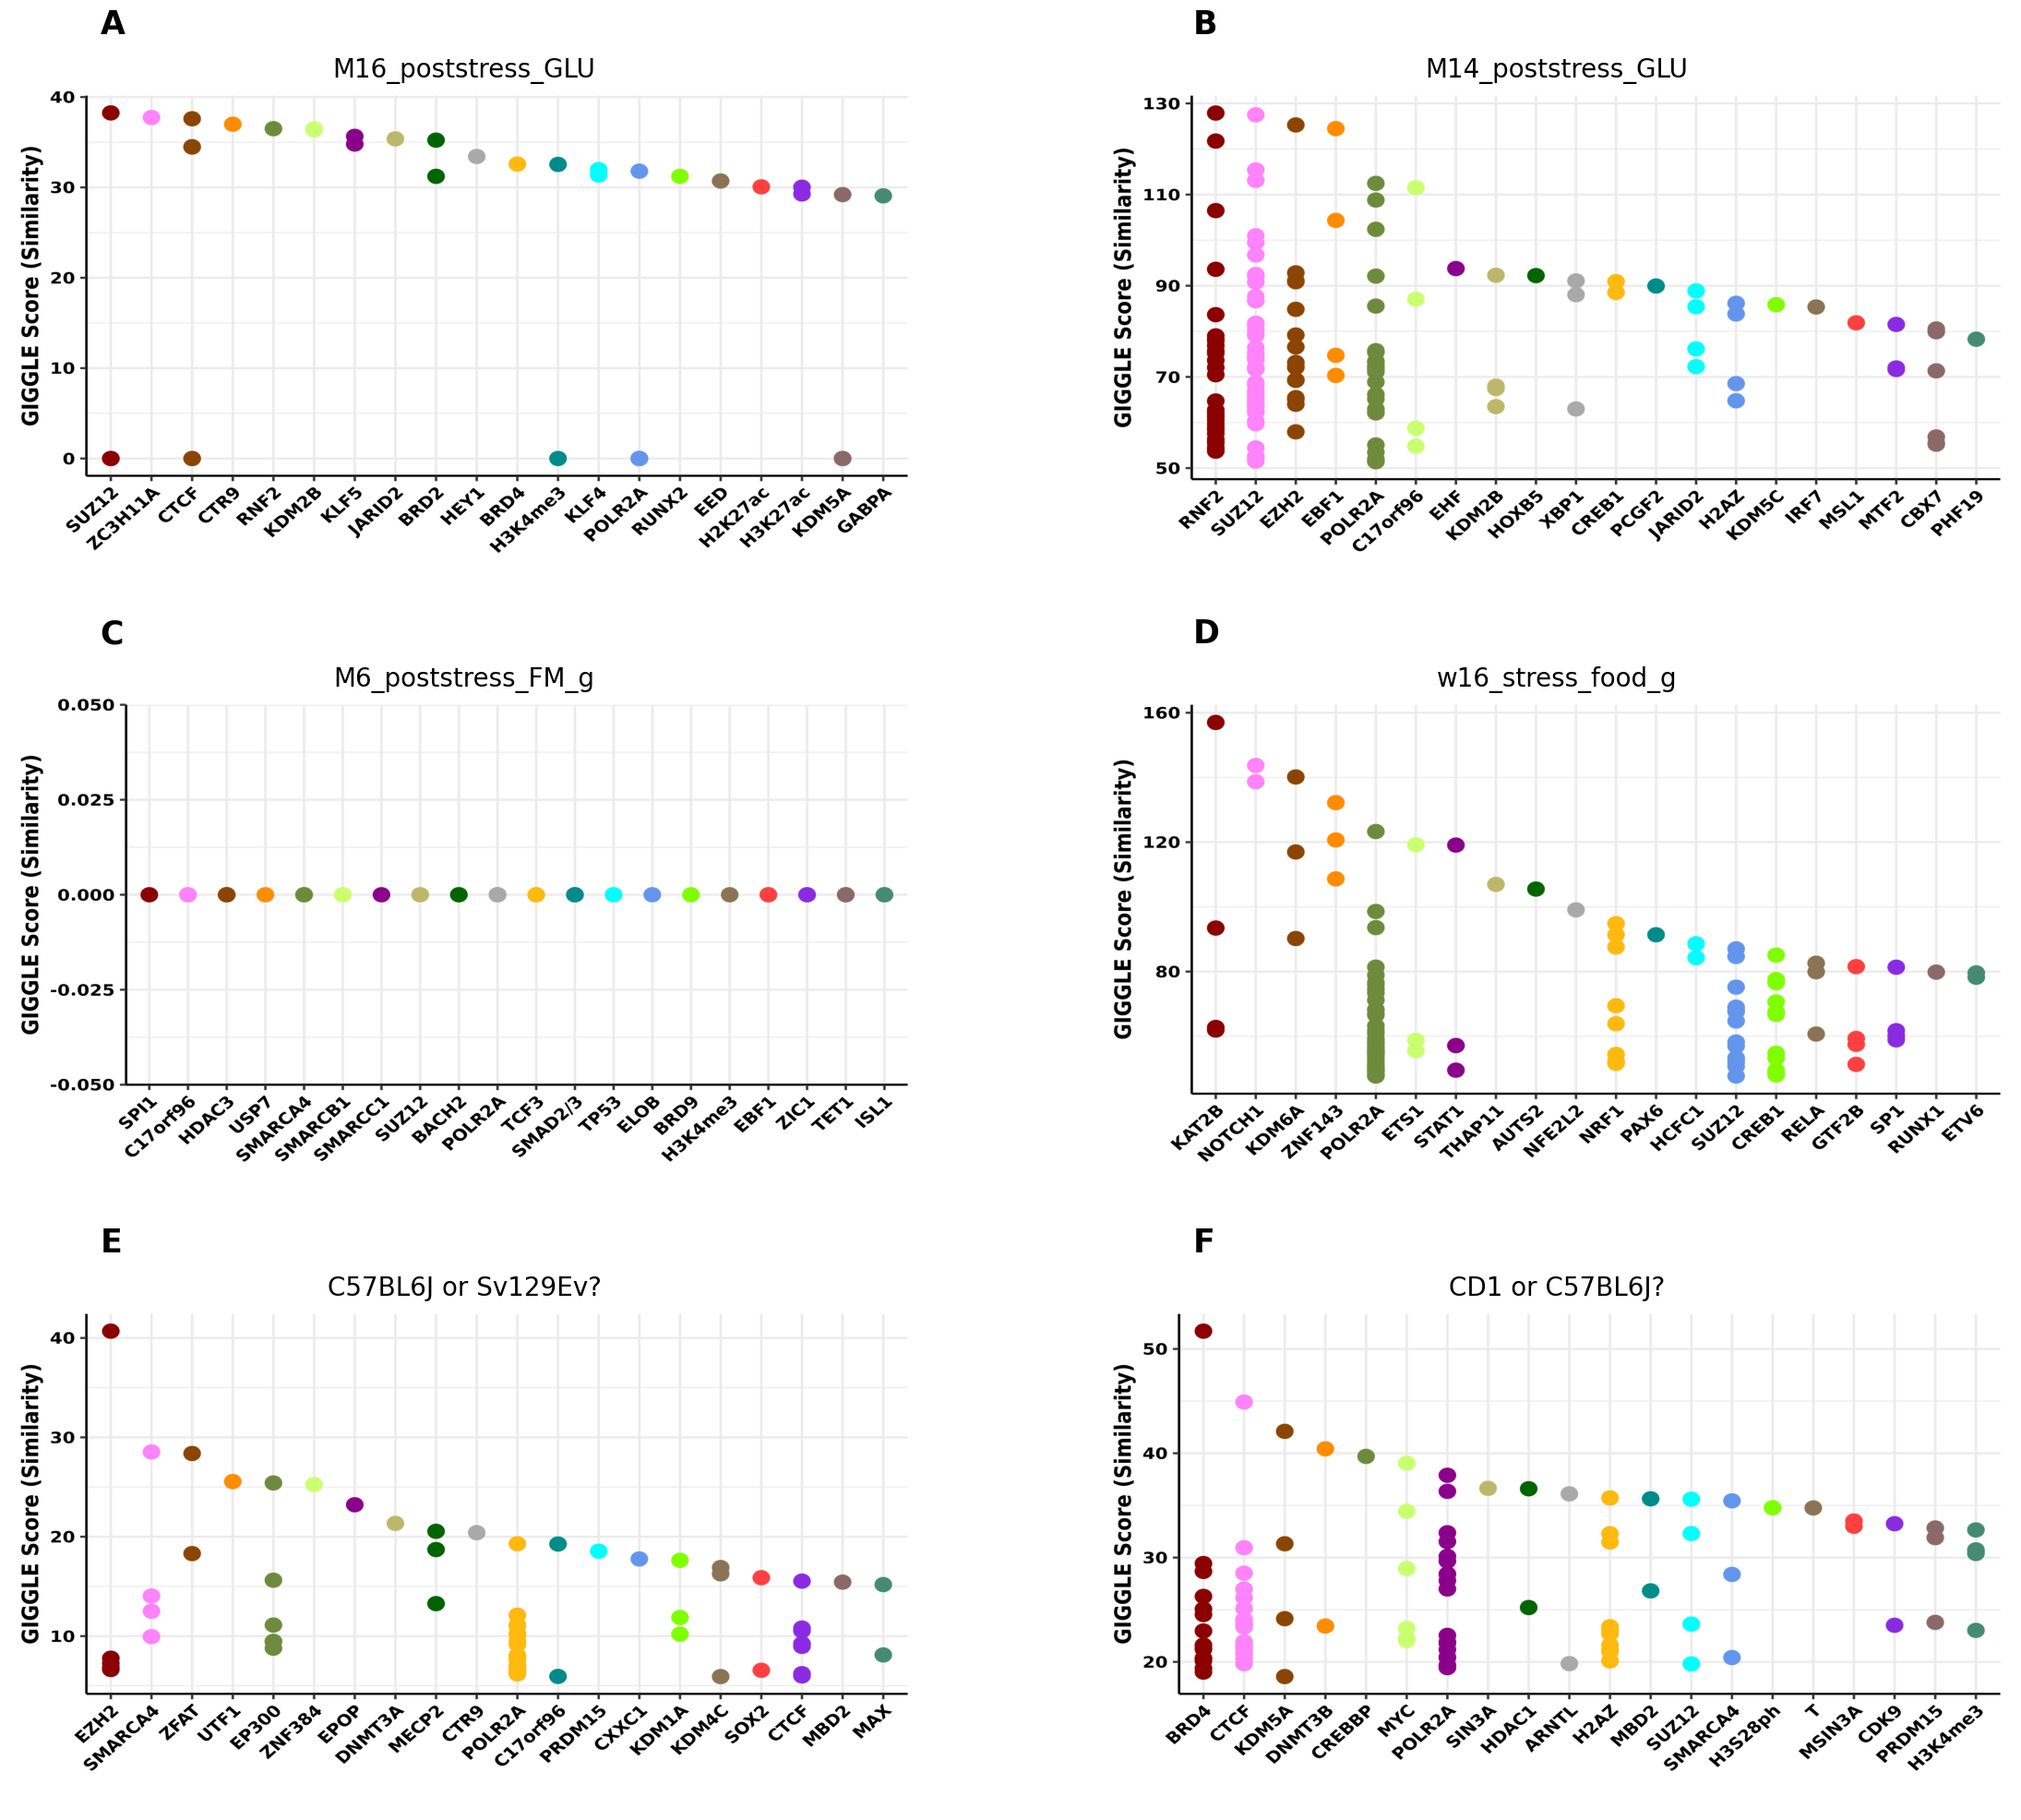

In [12]:
# get cistrome plots using unfiltered probes (so a larger set to select from)

%matplotlib inline

# this is trial and error, unfortunately 
fig_w = 2800
fig_h = 5000 

# generate cistrome plots by trait
get_cistrome(trait_vals_no_insig, fig_w, fig_h)